<a href="https://colab.research.google.com/github/hpnightowl/owlsbooks/blob/master/pharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [464]:
import pandas as pd
import matplotlib.pyplot as plt

pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [465]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [466]:
pharma_data.shape

(23097, 18)

In [467]:
pharma_data.corr() > 0.5

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Diagnosed_Condition,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Patient_ID,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Patient_Age,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Patient_Body_Mass_Index,False,False,False,False,True,False,False,False,False,False,False,False,False,False
A,False,False,False,False,False,True,False,False,False,False,False,False,False,False
B,False,False,False,False,False,False,True,False,False,False,False,False,False,False
C,False,False,False,False,False,False,False,True,False,False,False,False,False,False
D,False,False,False,False,False,False,False,False,True,False,False,False,False,False
E,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [468]:
pharma_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [469]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [470]:
print(pharma_data['Treated_with_drugs'].unique())
print(pharma_data['Patient_mental_condition'].unique())
print(pharma_data['Patient_Smoker'].unique())

['DX6' 'DX2 ' 'DX1 ' nan 'DX3 ' 'DX5 ' 'DX4 ' 'DX2 DX5 ' 'DX2 DX3 '
 'DX1 DX3 ' 'DX1 DX2 ' 'DX3 DX4 ' 'DX1 DX4 ' 'DX1 DX5 ' 'DX2 DX4 DX5 '
 'DX1 DX2 DX3 ' 'DX3 DX5 ' 'DX2 DX4 ' 'DX3 DX4 DX5 ' 'DX2 DX3 DX5 '
 'DX1 DX2 DX3 DX4 ' 'DX4 DX5 ' 'DX2 DX3 DX4 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX1 DX3 DX4 '
 'DX1 DX3 DX4 DX5 ' 'DX1 DX2 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 ']
['Stable']
['YES' 'NO' 'Cannot say']


In [471]:
pharma_data['Survived_1_year'].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

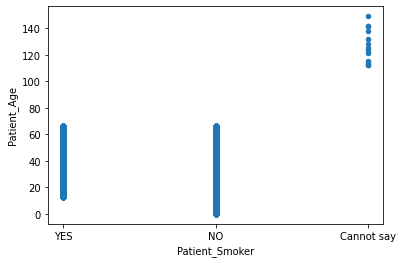

In [472]:
pharma_data.plot(kind='scatter', x='Patient_Smoker', y='Patient_Age') 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22561dd780>,
      dtype=object)

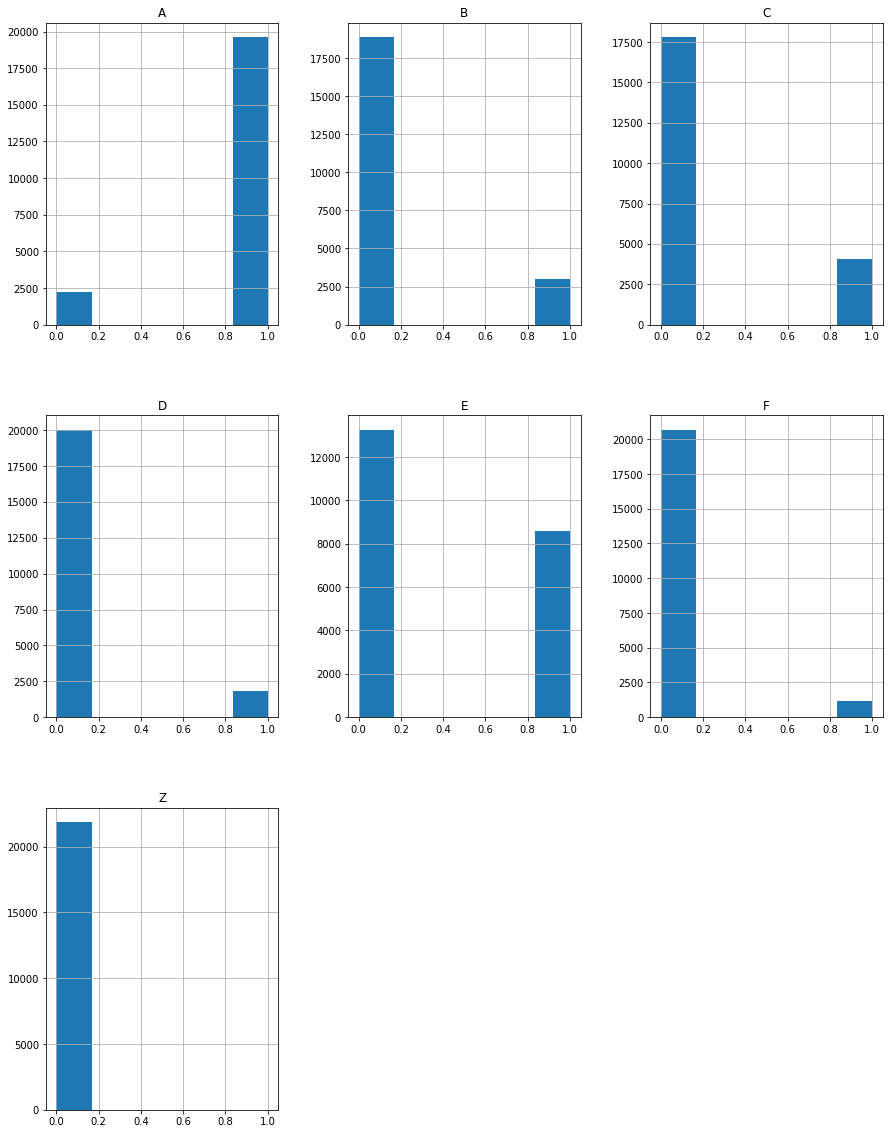

In [473]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
pharma_data.hist(column=["A", "B","C","D","E","F","Z"],bins=6,ax=ax)

In [474]:
pharma_data = pd.get_dummies(pharma_data, columns=['Treated_with_drugs'])

In [475]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pharma_data['Patient_Smoker']= le.fit_transform(pharma_data['Patient_Smoker']) #Yes =2 No = 1 Can't say = 0
pharma_data['Patient_Rural_Urban']= le.fit_transform(pharma_data['Patient_Rural_Urban']) # Urban =0 Rural =1 
pharma_data['Patient_mental_condition']= le.fit_transform(pharma_data['Patient_mental_condition']) # Stable = 0  unstable =1

In [476]:
pharma_data.head()


,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,22374,8,3333,56,18.479385,2,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,18164,5,5740,36,22.945566,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6283,23,10446,48,27.510027,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,5339,51,12011,5,19.130976,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33012,0,12513,128,1.348400,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [477]:
pharma_data['Number_of_prev_cond'] = pharma_data['Number_of_prev_cond'].fillna(np.mean(pharma_data['Number_of_prev_cond']))

In [478]:
X = pharma_data[['ID_Patient_Care_Situation','Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index','Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition','Number_of_prev_cond',       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX2 DX3 DX5 ', 'Treated_with_drugs_DX2 DX4 ',
       'Treated_with_drugs_DX2 DX4 DX5 ', 'Treated_with_drugs_DX2 DX5 ',
       'Treated_with_drugs_DX3 ', 'Treated_with_drugs_DX3 DX4 ',
       'Treated_with_drugs_DX3 DX4 DX5 ', 'Treated_with_drugs_DX3 DX5 ',
       'Treated_with_drugs_DX4 ', 'Treated_with_drugs_DX4 DX5 ',
       'Treated_with_drugs_DX5 ', 'Treated_with_drugs_DX6']] 
y = pharma_data[['Survived_1_year']]

In [479]:
X.isnull().sum()

ID_Patient_Care_Situation                  0
Diagnosed_Condition                        0
Patient_Age                                0
Patient_Body_Mass_Index                    0
Patient_Smoker                             0
Patient_Rural_Urban                        0
Patient_mental_condition                   0
Number_of_prev_cond                        0
Treated_with_drugs_DX1                     0
Treated_with_drugs_DX1 DX2                 0
Treated_with_drugs_DX1 DX2 DX3             0
Treated_with_drugs_DX1 DX2 DX3 DX4         0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5     0
Treated_with_drugs_DX1 DX2 DX3 DX5         0
Treated_with_drugs_DX1 DX2 DX4             0
Treated_with_drugs_DX1 DX2 DX4 DX5         0
Treated_with_drugs_DX1 DX2 DX5             0
Treated_with_drugs_DX1 DX3                 0
Treated_with_drugs_DX1 DX3 DX4             0
Treated_with_drugs_DX1 DX3 DX4 DX5         0
Treated_with_drugs_DX1 DX3 DX5             0
Treated_with_drugs_DX1 DX4                 0
Treated_wi

In [480]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9, random_state = 42)
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [481]:
y_pred = model.predict(X_test)

In [482]:
np.random.seed(9)
model_3 = RandomForestRegressor(n_estimators = 10, random_state = 47)
model_3.fit(X_train,y_train)
y_pred_3 = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [483]:
model_2 = DecisionTreeRegressor(max_depth = 3, random_state = 47)
model_2.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=47, splitter='best')

In [484]:
y_pred_2 = model.predict(X_test)

In [485]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))
print(f1_score(y_test, y_pred_2))
print(f1_score(y_test, y_pred_3))


0.7755548498641545
0.7755548498641545
0.7755548498641545
